# This is a baseline notebook and it uploads the dataset with one hot encoding and shows overfitting of the model.

#**Load the dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from numpy import array 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score


In [2]:
dataset = pd.read_csv("dataset.csv")

dataset =dataset.fillna(0)
dataset.shape

(219738, 207)

In [3]:
dataset_minmax = pd.read_csv("dataset_minmax.csv")
dataset_minmax.shape

(219738, 207)

In [14]:
dataset_pca = pd.read_csv("dataset_pca.csv")
dataset_pca.shape

(219738, 177)

In [4]:
dataset_minmax_corr =pd.read_csv("dataset_minmax_corr.csv")
dataset_minmax_corr.shape

(219738, 207)

#Xgboost without any preprocessing:

In [5]:
X=dataset.drop(columns=['label'])
y=dataset['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Nancy Saxena\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[15353     0]
 [    0 28595]]
1.0
XGBoost model accuracy score: 1.0000
[2.7028822e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6852766e-05
 2.0135463e-05 1.1415764e-05 3.4153221e-05 4.6948244e-05 2.4129917e-05
 1.7399763e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.9029127e-05 4.7992631e-05 1.4576650e-05
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7006093e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.00

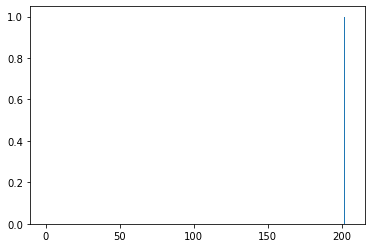

In [12]:
from matplotlib import pyplot
model1 = xgb.XGBClassifier(max_depth=5,verbosity=0,early_stopping_rounds=1,gamma=0.1,n_trees=2)
model1.fit(X_train, y_train)
predicted_y = model1.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_y))
print((accuracy_score(y_test, predicted_y)))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))
model1.feature_importances_

pyplot.bar(range(len(model1.feature_importances_)), model1.feature_importances_)
print(model1.feature_importances_)

In [ ]:
# Tried with differnt parameters the model was still over fitting.

#XGBoost with pca

In [16]:
X=dataset_pca.drop(columns=['label'])
y=dataset_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))

C:\Users\Nancy Saxena\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22973
         1.0       1.00      1.00      1.00     42949

    accuracy                           1.00     65922
   macro avg       1.00      1.00      1.00     65922
weighted avg       1.00      1.00      1.00     65922

[[22968     5]
 [    3 42946]]
XGBoost model accuracy score: 0.9999


#XGBoost with Minmax

In [18]:
X=dataset_minmax.drop(columns=['label'])
y=dataset_minmax['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))

C:\Users\Nancy Saxena\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15347
         1.0       1.00      1.00      1.00     28601

    accuracy                           1.00     43948
   macro avg       1.00      1.00      1.00     43948
weighted avg       1.00      1.00      1.00     43948

[[15347     0]
 [    0 28601]]
XGBoost model accuracy score: 1.0000


#XGBoost with minmax and corr

In [19]:
X=dataset_minmax_corr.drop(columns=['label'])
y=dataset_minmax_corr['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_y)))

C:\Users\Nancy Saxena\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15278
         1.0       1.00      1.00      1.00     28670

    accuracy                           1.00     43948
   macro avg       1.00      1.00      1.00     43948
weighted avg       1.00      1.00      1.00     43948

[[15278     0]
 [    0 28670]]
XGBoost model accuracy score: 1.0000
